In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

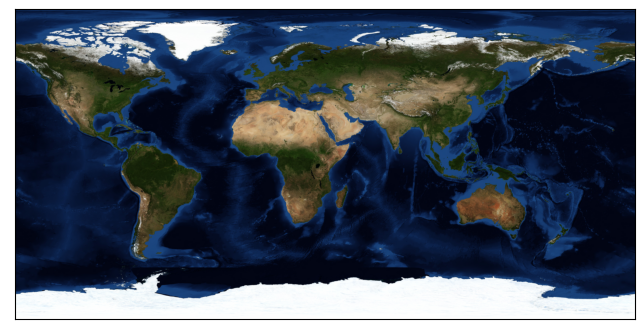

In [2]:
plt.figure(figsize=(8,8))
m=Basemap(projection='cyl', resolution=None, lat_0=0, lon_0=37.063)
m.bluemarble(scale=0.5);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


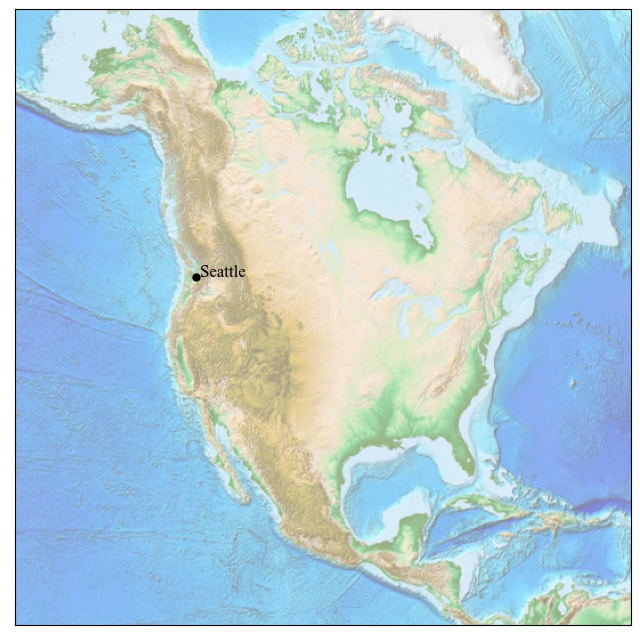

In [3]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='poly', resolution=None,
            width=8E6, height=8E6,
            lat_0=45, lon_0=-100,)

m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Seattle ', fontsize=12, fontfamily='Times New Roman');

### Map Projections

In [4]:
from itertools import chain

def draw_map(m, scale=0.2):
    #draw shaded-relief image
    m.shadedrelief(scale=scale)
    
    #lats and longs are returned as a dictionary
    lats=m.drawparallels(np.linspace(-90,90,13))
    lons=m.drawmeridians(np.linspace(-180,180,13))
    
    #keys contain the plt.Line2D instances
    lat_lines=chain(*(tup[1][0] for tup in lats.items()))
    lon_lines=chain(*(tup[1][0] for tup in lons.items()))
    all_lines=chain(lat_lines, lon_lines)
    
    #cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

#### Cylindrical projection

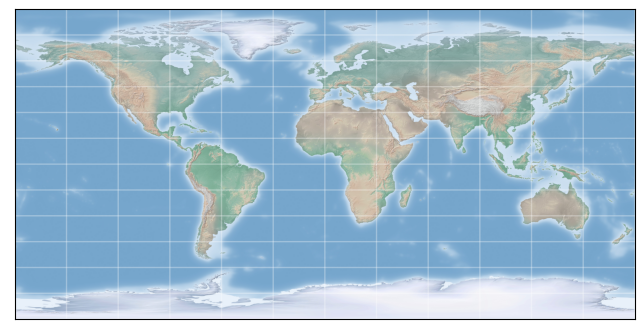

In [5]:
fig=plt.figure(figsize=(8,6), edgecolor='w')
m=Basemap(projection='cyl', resolution=None,
         llcrnrlat=-90, urcrnrlat=90,
         llcrnrlon=-180, urcrnrlon=180)
draw_map(m)

#### Pseudo-cylindrical projections

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


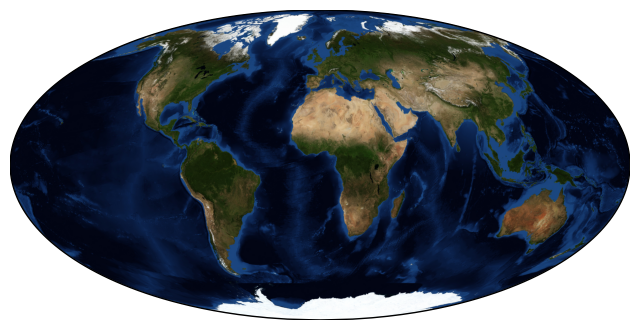

In [6]:
fig=plt.figure(figsize=(8,6), edgecolor='w')
m=Basemap(projection='moll', resolution=None,
         lat_0=0, lon_0=0)
im1=m.bluemarble()
im1.axes.add_image(im1)
plt.show()

#### Perspective Projections

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


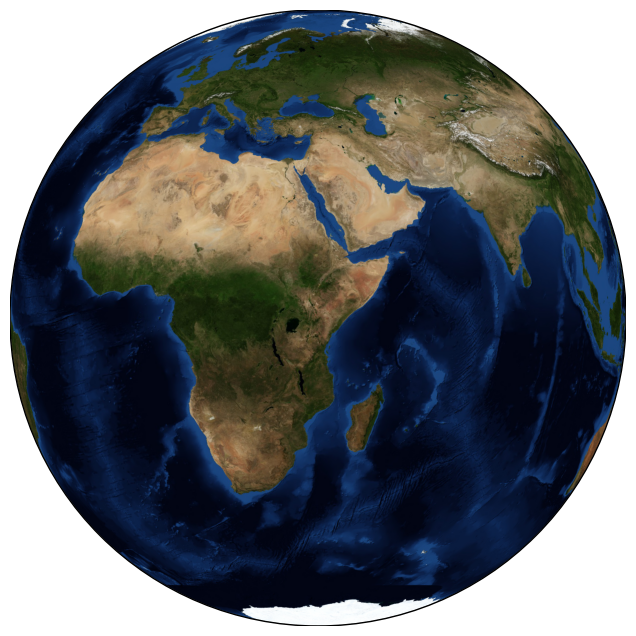

In [7]:
fig=plt.figure(figsize=(8,8))
m=Basemap(projection='ortho', resolution=None,
         lat_0=0.2367, lon_0=37.640)
im1=m.bluemarble()
im1.axes.add_image(im1)
plt.show()

#### Conic Projections

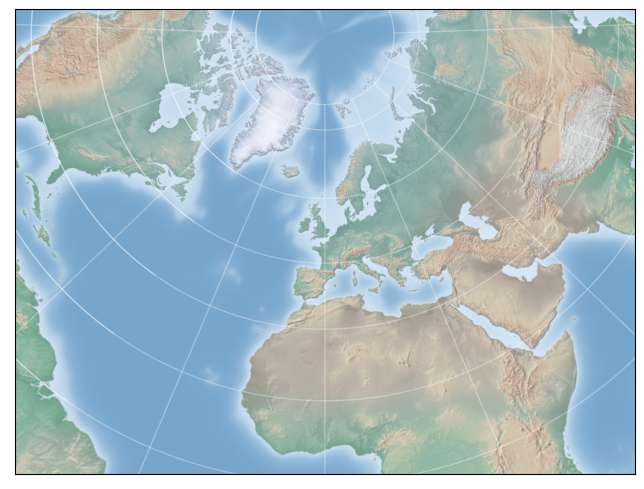

In [8]:
fig=plt.figure(figsize=(8,8))
m=Basemap(projection='lcc', resolution='l',
         lon_0=0, lat_0=50, lat_1=45, lat_2=55,
         width=1.6E7, height=1.2E7)
draw_map(m)

###### Resolution

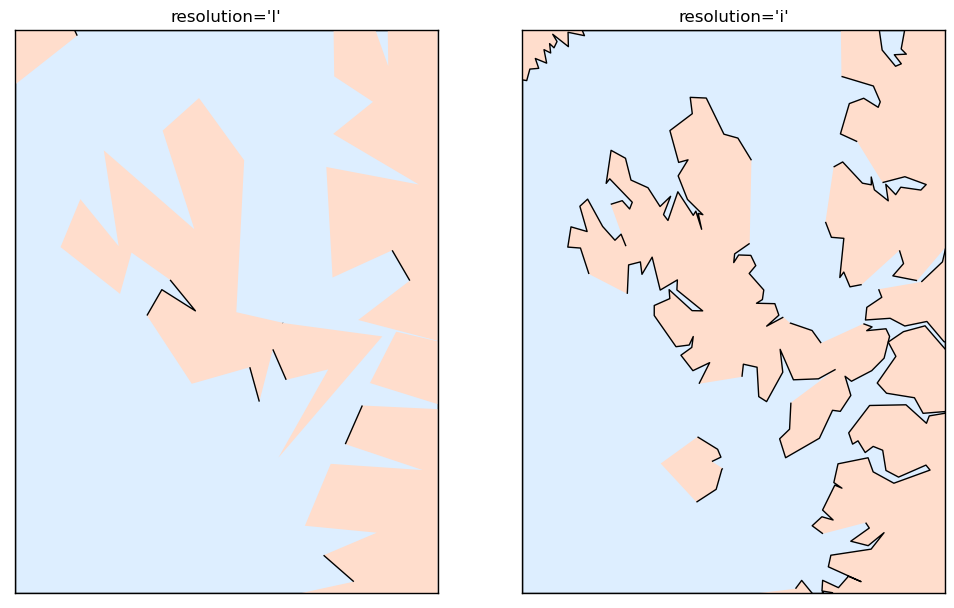

In [9]:
fig, ax=plt.subplots(1,2, figsize=(12,8))

for i, res in enumerate(['l','i']):
    m=Basemap(projection='gnom', lat_0=57.3, lon_0=-6.2,
             width=90000, height=120000, resolution=res, ax=ax[i])
    m.fillcontinents(color='#FFDDCC', lake_color='#DDEEFF')
    m.drawmapboundary(fill_color='#DDEEFF')
    m.drawcoastlines()
    ax[i].set_title("resolution='{0}'".format(res));
    

### Plotting Data on maps

#### Example:California cities

In [10]:
import pandas as pd
cities=pd.read_csv('~/datascience/matplotlib/california_cities.csv')

cities.head()

,Unnamed: 0,County,City,Incorportation_date,pop_april_1980,pop_april_1990,pop_april_2000,pop_april_2010,Latitude,Longitude,Total_Pop
0,0,San Bernardino,Adelanto,1970,2164.0,8517.0,18130.0,31765.0,34.582769,-117.409214,60576.0
1,2,Alameda,Alameda,1854,63852.0,76459.0,72259.0,73812.0,37.765206,-122.241636,286382.0
2,3,Alameda,Albany,1908,15130.0,16327.0,16444.0,18539.0,37.886869,-122.297747,66440.0
3,4,Los Angeles,Alhambra,1903,64767.0,82106.0,85804.0,83089.0,34.095286,-118.127014,315766.0
4,5,Modoc,Alturas,1901,3025.0,3231.0,2892.0,2827.0,41.487114,-120.542456,11975.0


In [11]:
lat=cities['Latitude'].values
lon=cities['Longitude'].values
pop=cities['Total_Pop'].values


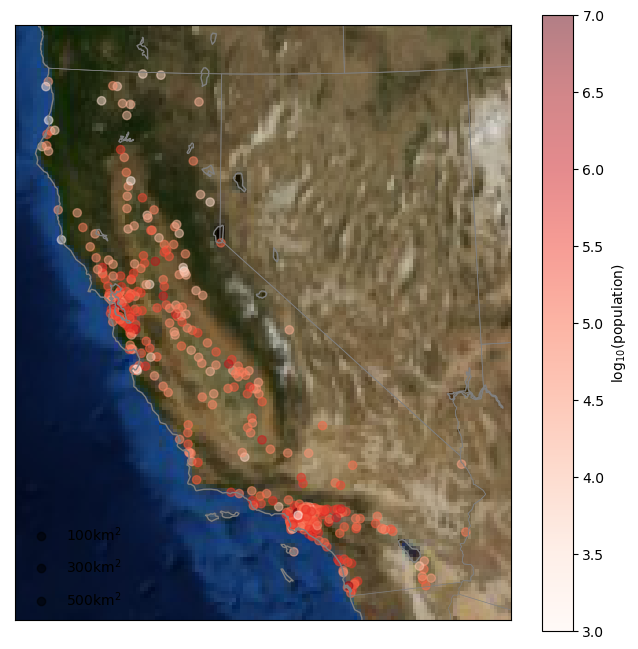

In [12]:
#Draw map background
fig=plt.figure(figsize=(8,8))
m=Basemap(projection='lcc', resolution='i',
         lat_0=37.5, lon_0=-119,
         width=1E6, height=1.2E6)
m.bluemarble()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

#Scatter city data, with color reflecting population
m.scatter(lon,lat, latlon=True,
          c=np.log10(pop),
          cmap='Reds', alpha=0.5)

#create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3,7)

#make legend with dummy points
for a in [100,300,500]:
    plt.scatter([],[],c='k', alpha=0.5,
               label=str(a)+'km$^2$')
plt.legend(scatterpoints=1, frameon=False,
          labelspacing=1, loc='lower left')

### Example:Surface Temperature Data

In [13]:
!curl -O http://data.giss.nasa.gov/pub/gistemp/gistemp250.nc.gz
!gunzip gistemp250.nc.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0curl: (6) Could not resolve host: data.giss.nasa.gov
'gunzip' is not recognized as an internal or external command,
operable program or batch file.


In [14]:
from netCDF4 import Dataset
data=Dataset('gistemp250.nc')

OSError: [Errno -51] NetCDF: Unknown file format: b'gistemp250.nc'

In [ ]:
from netCDF4 import date2index
from datetime import datetime
timeindex=date2index(datetime(2014,1,15),
                    data.variables['time'])

In [ ]:
lat=data.variables['lat'][:]
lon=data.variables['lon'][:]
lon,lat=np.meshgrid(lon,lat)
temp_anomaly=data.variables['tempanomaly'][timeindex]

In [ ]:
fig = plt.figure(figsize=(10, 8))
m = Basemap(projection='lcc', resolution='c',
            width=8E6, height=8E6,
            lat_0=45, lon_0=-100,)
m.shadedrelief(scale=0.5)
m.pcolormesh(lon, lat, temp_anomaly,
             latlon=True, cmap='RdBu_r')
plt.clim(-8, 8)
m.drawcoastlines(color='lightgray')

plt.title('January 2014 Temperature Anomaly')
plt.colorbar(label='temperature anomaly (°C)');